# TP Protéomique - Analyse bioinformatique

### Vérifications de Jupyter

In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

<IPython.core.display.Javascript object>


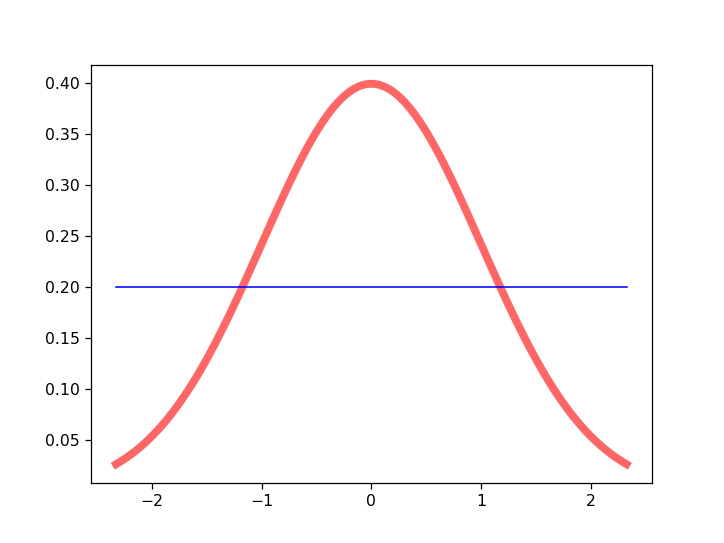

In [2]:
fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6)

ax.plot(x, np.full(len(x), 0.2),
       'b-', lw=1)

fig.show()

## Données

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('data/TCL_wt1.tsv', sep='\t')
df = df.dropna()

In [5]:
df

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
0,P75936,Basal-body rod modification protein FlgD OS=Es...,flgD,0.075816993,-3.721334942,0.000055,4.260067469
1,P76231,Uncharacterized protein YeaC OS=Escherichia co...,yeaC,0.092810458,-3.429568818,0.000351,3.45462743
2,P0A8S9,Flagellar transcriptional regulator FlhD OS=Es...,flhD,0.102614379,-3.284695189,0.000027,4.571899347
4,P05706,PTS system glucitol/sorbitol-specific EIIA com...,srlB,0.108496732,-3.204276506,0.019963,1.699767669
5,P29744,Flagellar hook-associated protein 3 OS=Escheri...,flgL,0.124183007,-3.009460329,0.036746,1.434786589
...,...,...,...,...,...,...,...
2011,P77330,Prophage lipoprotein Bor homolog OS=Escherichi...,borD,1.535947712,0.619129104,0.310725,0.507623276
2016,P02930,Outer membrane protein TolC OS=Escherichia col...,tolC,1.552287582,0.634395861,0.013373,1.873756665
2020,P0A917,Outer membrane protein X OS=Escherichia coli (...,ompX,1.579738562,0.65968582,0.002226,2.652390664
2021,P02931,Outer membrane protein F OS=Escherichia coli (...,ompF,1.754901961,0.811390435,0.000068,4.16495627


In [6]:
from xml.etree.ElementTree import parse, dump
# Parse the E.Coli proteome XML Document
tree = parse('data/uniprot-proteome_UP000000625.xml')
root = tree.getroot()
ns = '{http://uniprot.org/uniprot}' # MANDATORY PREFIX FOR ANY SEARCH within document
# Store all entries aka proteins in a list of xml nodes
proteins = root.findall(ns + 'entry')
# Display the xml subtree of the first protein 
#dump(proteins[0])

In [7]:
# Find the xml subtree of a protein with accession "P31224"
for entry in proteins:
    accessions = entry.findall(ns+"accession")
    for acc in accessions:
        if acc.text == "P31224":
            dump(entry)
            break

<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" created="1993-07-01" dataset="Swiss-Prot" modified="2020-08-12" version="187">
<ns0:accession>P31224</ns0:accession>
<ns0:accession>Q2MBW5</ns0:accession>
<ns0:name>ACRB_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName>Multidrug efflux pump subunit AcrB</ns0:fullName>
</ns0:recommendedName>
<ns0:alternativeName>
<ns0:fullName>AcrAB-TolC multidrug efflux pump subunit AcrB</ns0:fullName>
</ns0:alternativeName>
<ns0:alternativeName>
<ns0:fullName>Acridine resistance protein B</ns0:fullName>
</ns0:alternativeName>
</ns0:protein>
<ns0:gene>
<ns0:name type="primary">acrB</ns0:name>
<ns0:name type="synonym">acrE</ns0:name>
<ns0:name type="ordered locus">b0462</ns0:name>
<ns0:name type="ordered locus">JW0451</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific">Escherichia coli (strain K12)</ns0:name>
<ns0:dbReference id="83333" type="NCBI Taxonomy" />
<ns0:lineage>
<ns0:taxon>Bacteria</ns0:taxon>
<ns0:taxon>Proteo

</ns0:dbReference>
<ns0:dbReference id="1OY8" type="PDB">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="3.63" />
<ns0:property type="chains" value="A=1-1049" />
</ns0:dbReference>
<ns0:dbReference id="1OY9" type="PDB">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="3.80" />
<ns0:property type="chains" value="A=1-1049" />
</ns0:dbReference>
<ns0:dbReference id="1OYD" type="PDB">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="3.80" />
<ns0:property type="chains" value="A=1-1049" />
</ns0:dbReference>
<ns0:dbReference id="1OYE" type="PDB">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="3.48" />
<ns0:property type="chains" value="A=1-1049" />
</ns0:dbReference>
<ns0:dbReference id="1T9T" type="PDB">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="3.23" />
<ns0:property type="chains" value="A=1-1049" />
</ns0

<ns0:location>
<ns0:begin position="115" />
<ns0:end position="117" />
</ns0:location>
</ns0:feature>
<ns0:feature evidence="13" type="helix">
<ns0:location>
<ns0:begin position="120" />
<ns0:end position="123" />
</ns0:location>
</ns0:feature>
<ns0:feature evidence="13" type="strand">
<ns0:location>
<ns0:begin position="128" />
<ns0:end position="130" />
</ns0:location>
</ns0:feature>
<ns0:feature evidence="13" type="strand">
<ns0:location>
<ns0:begin position="132" />
<ns0:end position="144" />
</ns0:location>
</ns0:feature>
<ns0:feature evidence="9" type="strand">
<ns0:location>
<ns0:begin position="145" />
<ns0:end position="147" />
</ns0:location>
</ns0:feature>
<ns0:feature evidence="13" type="helix">
<ns0:location>
<ns0:begin position="151" />
<ns0:end position="161" />
</ns0:location>
</ns0:feature>
<ns0:feature evidence="13" type="helix">
<ns0:location>
<ns0:begin position="163" />
<ns0:end position="168" />
</ns0:location>
</ns0:feature>
<ns0:feature evidence="2" type="turn">

In [8]:
df['Log2 Corrected Abundance Ratio'] = pd.to_numeric(df['Log2 Corrected Abundance Ratio'], errors='coerce')

<IPython.core.display.Javascript object>


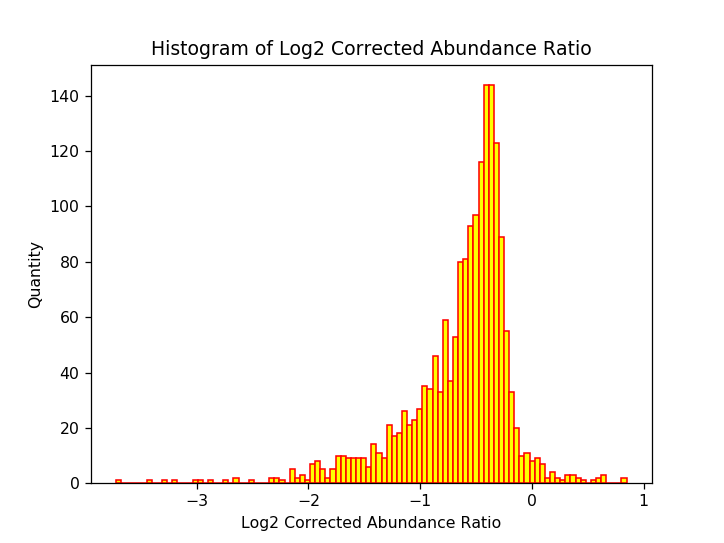

In [9]:
fig, ax = plt.subplots()
ax.hist(df['Log2 Corrected Abundance Ratio'], bins = 100, color = 'yellow',
            edgecolor = 'red')
ax.set_xlabel('Log2 Corrected Abundance Ratio')
ax.set_ylabel('Quantity')
ax.set_title('Histogram of Log2 Corrected Abundance Ratio')

fig.show()

In [10]:
mean = np.mean(df['Log2 Corrected Abundance Ratio'])

In [11]:
var_bias = np.var(df['Log2 Corrected Abundance Ratio'])
n = len(df['Log2 Corrected Abundance Ratio'])

In [12]:
var = var_bias*n/(n-1)

In [13]:
print(mean, var)

-0.6386262156443276 0.22161436206330576


In [14]:
y = df['Log2 Corrected Abundance Ratio']

<IPython.core.display.Javascript object>


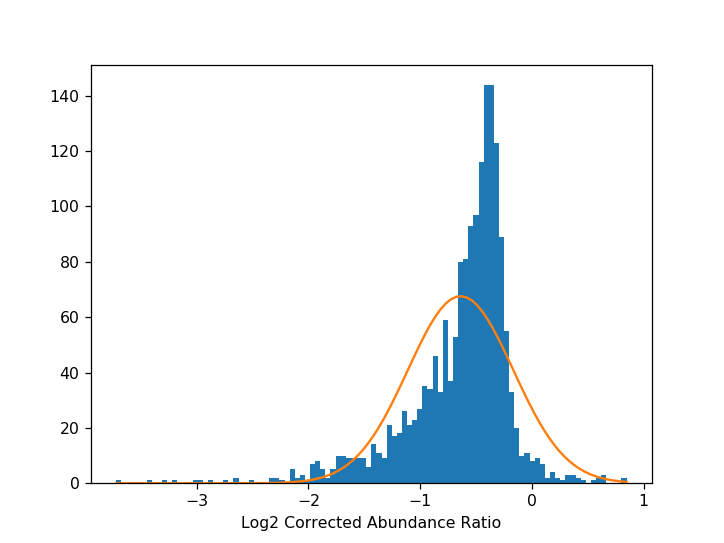

Text(0.5, 0, 'Log2 Corrected Abundance Ratio')

In [15]:
fig, ax = plt.subplots()
hist = ax.hist(y, bins=100) # draw histogram
x = np.linspace(min(y), max(y), 100) # generate PDF domain points
dx = hist[1][1] - hist[1][0] # Get single value bar height
scale = len(y)*dx # scale accordingly
ax.plot(x, norm.pdf(x, mean, np.sqrt(var))*scale) # compute theoritical PDF and draw it
ax.set_xlabel('Log2 Corrected Abundance Ratio')

Moyenne - plus basse - moins de protéines dans les conditions expérimentales


In [16]:
df['-LOG10 Adj.P-val'] = pd.to_numeric(df['-LOG10 Adj.P-val'], errors='coerce')
y2 = df['-LOG10 Adj.P-val']

<IPython.core.display.Javascript object>


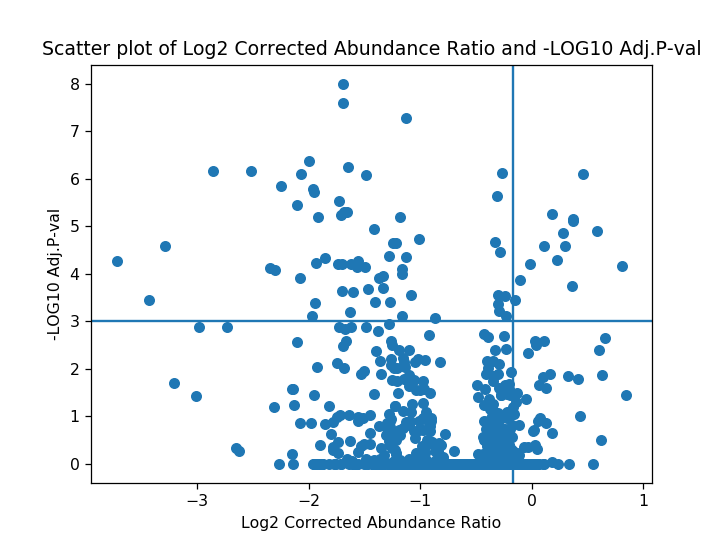

Text(0.5, 1.0, 'Scatter plot of Log2 Corrected Abundance Ratio and -LOG10 Adj.P-val')

In [17]:
figg, axe = plt.subplots()
axe.scatter(y, y2)
axe.axvline(mean + np.sqrt(var))
axe.axhline(np.log10(1000))
axe.set_xlabel('Log2 Corrected Abundance Ratio')
axe.set_ylabel('-LOG10 Adj.P-val')
axe.set_title('Scatter plot of Log2 Corrected Abundance Ratio and -LOG10 Adj.P-val')

In [18]:
qdr = df[(df['Log2 Corrected Abundance Ratio'] > mean + np.sqrt(var))  & 
          (df['-LOG10 Adj.P-val'] > 3)] 

In [19]:
qdr

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
1862,P0A8V6,Fatty acid metabolism regulator protein OS=Esc...,fadR,0.90130719,-0.149909,3.510530e-04,3.454627
1898,P0A9Q1,Aerobic respiration control protein ArcA OS=Es...,arcA,0.931372549,-0.102570,1.359440e-04,3.866640
1929,P02358,30S ribosomal protein S6 OS=Escherichia coli (...,rpsF,0.990849673,-0.013262,6.276360e-05,4.202292
1968,P0ACF8,DNA-binding protein H-NS OS=Escherichia coli (...,hns,1.083006536,0.115042,2.679790e-05,4.571899
1977,P62399,50S ribosomal protein L5 OS=Escherichia coli (...,C813_RS16705; C813_RS25010; rplE; AB182_RS27795,1.133986928,0.181404,5.518020e-06,5.258216
1979,P0A905,Outer membrane lipoprotein SlyB OS=Escherichia...,slyB,1.173856209,0.231256,5.109990e-05,4.291580
1982,P76506,Probable phospholipid-binding lipoprotein MlaA...,mlaA,1.21372549,0.279442,1.408320e-05,4.851298
1984,P13036,Fe(3+) dicitrate transport protein FecA OS=Esc...,fecA,1.230718954,0.299501,2.679790e-05,4.571899
1989,P10384,Long-chain fatty acid transport protein OS=Esc...,fadL,1.283660131,0.360263,1.849300e-04,3.732993
1992,P06971,Ferrichrome outer membrane transporter/phage r...,fhuA,1.293464052,0.371240,6.974880e-06,5.156463


In [31]:
uniprots = list(qdr['Accession'])
uniprots

['P0A8V6',
 'P0A9Q1',
 'P02358',
 'P0ACF8',
 'P62399',
 'P0A905',
 'P76506',
 'P13036',
 'P10384',
 'P06971',
 'P0A910',
 'P06996',
 'P76344',
 'P02931']

In [21]:
tree = parse('data/uniprot-proteome_UP000000625.xml')
root = tree.getroot()
ns = '{http://uniprot.org/uniprot}' # MANDATORY PREFIX FOR ANY SEARCH within document
# Store all entries aka proteins in a list of xml nodes
proteins = root.findall(ns + 'entry')
# Display the xml subtree of the first protein 
go = []


for entry in proteins:
    accessions = entry.findall(ns+"accession")
    for acc in accessions:
        if acc.text in uniprots:
            for ref in entry.findall(ns+"dbReference"):
                name = ref.get('type')
                if name == 'GO':
                    print(ref.get('id'))
                    go.append(ref.get('id'))
                    #dump(entry)
            #break

GO:0009279
GO:0045203
GO:0046930
GO:0046872
GO:0015288
GO:0001618
GO:0006974
GO:0034220
GO:0015914
GO:0046813
GO:0005829
GO:0030288
GO:0046870
GO:0046872
GO:0008270
GO:0071276
GO:0070301
GO:0034224
GO:0006882
GO:0005829
GO:0032993
GO:0001216
GO:0003700
GO:0001217
GO:0042802
GO:0000156
GO:0000976
GO:0045892
GO:0000160
GO:0045893
GO:0006355
GO:0009279
GO:0016021
GO:0034702
GO:0046930
GO:0042912
GO:0097718
GO:0042802
GO:0005216
GO:0015075
GO:0008289
GO:0001530
GO:0015288
GO:0047485
GO:0042910
GO:0006855
GO:0034220
GO:0070207
GO:0005829
GO:0022625
GO:0008097
GO:0003723
GO:0003735
GO:0000049
GO:0000027
GO:0006412
GO:0009279
GO:0120010
GO:0009279
GO:0016021
GO:0016020
GO:0019867
GO:0046930
GO:0042802
GO:0015288
GO:0006974
GO:0000746
GO:0009597
GO:0034220
GO:0006811
GO:0046718
GO:0009279
GO:0009279
GO:0016021
GO:0048037
GO:0005506
GO:0019904
GO:0015344
GO:0038023
GO:0015643
GO:0046790
GO:0055072
GO:0005829
GO:0022627
GO:0048027
GO:0070181
GO:0003735
GO:0006412
GO:0005829
GO:0016020
GO:0009295

In [26]:
nice_go = set(go)
len(nice_go)

lot_gow = []

In [28]:
for item in go:
    if go.count(item) > 3 and item not in lot_gow:
        print(item)
        lot_gow.append(item)

GO:0005829
GO:0042802
GO:0016021


In [30]:
from scipy.stats import hypergeom
[M, n, N] = [20, 7, 12]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_pro = rv.pmf(x)